In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score

# Load the car evaluation dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, header=None, names=column_names)

# Map categorical variables to numerical values
df['buying'] = df['buying'].map({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
df['maint'] = df['maint'].map({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
df['doors'] = df['doors'].map({'2': 2, '3': 3, '4': 4, '5more': 5})
df['persons'] = df['persons'].map({'2': 2, '4': 4, 'more': 5})
df['lug_boot'] = df['lug_boot'].map({'small': 1, 'med': 2, 'big': 3})
df['safety'] = df['safety'].map({'low': 1, 'med': 2, 'high': 3})
df['class'] = df['class'].map({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})

# Separate features (X) and target variable (y)
X = df.drop(columns=['class'])
y = df['class']

# Initialize variables
num_iterations = 20
training_sizes = [0.6, 0.7, 0.8]
results = []

# Loop through each training size
for size in training_sizes:
    accuracies_entropy = []
    accuracies_gini = []
    for _ in range(num_iterations):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)

        # Train decision tree classifier using entropy
        classifier_entropy = DecisionTreeClassifier(criterion='entropy')
        classifier_entropy.fit(X_train, y_train)

        # Evaluate accuracy using confusion matrix and F1-score
        y_pred_entropy = classifier_entropy.predict(X_test)
        accuracy_entropy = np.mean(y_pred_entropy == y_test)
        accuracies_entropy.append(accuracy_entropy)

        # Train decision tree classifier using Gini index
        classifier_gini = DecisionTreeClassifier(criterion='gini')
        classifier_gini.fit(X_train, y_train)

        # Evaluate accuracy using confusion matrix and F1-score
        y_pred_gini = classifier_gini.predict(X_test)
        accuracy_gini = np.mean(y_pred_gini == y_test)
        accuracies_gini.append(accuracy_gini)

    # Calculate average accuracy for entropy and Gini index
    avg_accuracy_entropy = np.mean(accuracies_entropy)
    avg_accuracy_gini = np.mean(accuracies_gini)

    # Store results
    results.append((size, avg_accuracy_entropy, avg_accuracy_gini))

# Print results
for size, avg_accuracy_entropy, avg_accuracy_gini in results:
    print(f"Training Size: {size * 100}%")
    print(f"Average Accuracy (Entropy): {avg_accuracy_entropy:.4f}")
    print(f"Average Accuracy (Gini Index): {avg_accuracy_gini:.4f}")
    print()


Training Size: 60.0%
Average Accuracy (Entropy): 0.9689
Average Accuracy (Gini Index): 0.9664

Training Size: 70.0%
Average Accuracy (Entropy): 0.9709
Average Accuracy (Gini Index): 0.9652

Training Size: 80.0%
Average Accuracy (Entropy): 0.9662
Average Accuracy (Gini Index): 0.9650



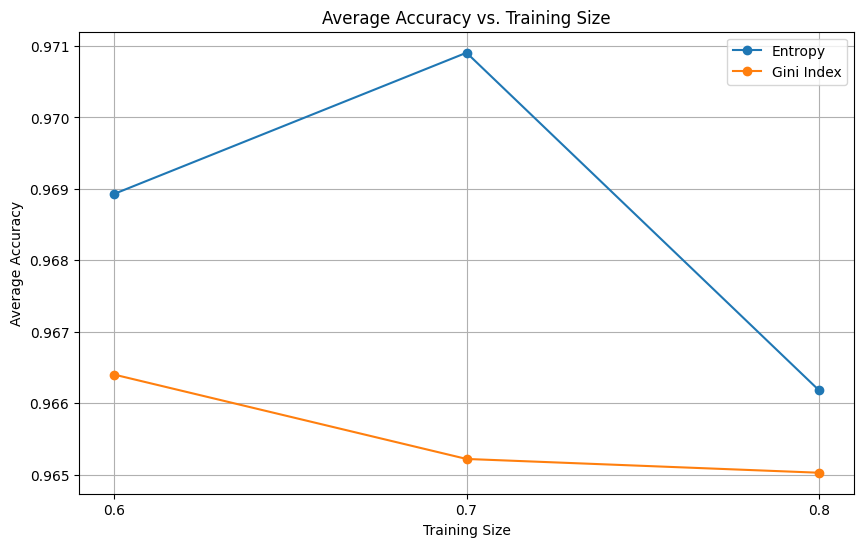

In [ ]:
import matplotlib.pyplot as plt

# Extracting results
training_sizes = [result[0] for result in results]
avg_accuracy_entropy = [result[1] for result in results]
avg_accuracy_gini = [result[2] for result in results]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, avg_accuracy_entropy, marker='o', label='Entropy')
plt.plot(training_sizes, avg_accuracy_gini, marker='o', label='Gini Index')
plt.title('Average Accuracy vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Average Accuracy')
plt.xticks(training_sizes)
plt.legend()
plt.grid(True)
plt.show()
